## Boxplot

* Мы построим boxplot для анализа распределения данных в тестовой и контрольной группах до и после внедрения новостной ленты.

#### 1. Подключаемся к базе

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/ab-test.csv")

print(df.to_string())

        uid        diff    time    group
0    user_1 -103.333333   after     test
1    user_1   -6.000000  before     test
2   user_18  -10.000000   after     test
3   user_18   -3.500000  before     test
4   user_19  -82.333333   after     test
5   user_19 -148.000000  before     test
6   user_21  -78.500000   after     test
7   user_21 -112.500000  before     test
8   user_25 -127.500000   after     test
9   user_25  -69.333333  before     test
10  user_28 -136.500000   after     test
11  user_28  -53.000000  before     test
12   user_3 -158.500000   after     test
13   user_3  -70.000000  before     test
14  user_12  -75.000000   after  control
15  user_12 -103.000000  before  control
16  user_13  -81.500000   after  control
17  user_13  -15.500000  before  control
18  user_15  -32.000000   after  control
19  user_15   -3.000000  before  control
20  user_16   17.500000   after  control
21  user_16 -153.000000  before  control
22   user_2  -94.000000   after  control
23   user_2 -202

#### 2. Обработка данных

In [44]:
control_group = df[df['group'] == 'control']
test_group = df[df['group'] == 'test']

control_before = control_group[control_group['time'] == 'before']
control_after = control_group[control_group['time'] == 'after']
test_before = test_group[test_group['time'] == 'before']
test_after = test_group[test_group['time'] == 'after']

print("\ncontrol_before\n", control_before.head(3))
print("\ncontrol_after\n", control_after.head(3))
print("\ntest_before\n", test_before.head(3))
print("\ntest_after\n", test_after.head(3))


control_before
         uid   diff    time    group
15  user_12 -103.0  before  control
17  user_13  -15.5  before  control
19  user_15   -3.0  before  control

control_after
         uid  diff   time    group
14  user_12 -75.0  after  control
16  user_13 -81.5  after  control
18  user_15 -32.0  after  control

test_before
        uid   diff    time group
1   user_1   -6.0  before  test
3  user_18   -3.5  before  test
5  user_19 -148.0  before  test

test_after
        uid        diff   time group
0   user_1 -103.333333  after  test
2  user_18  -10.000000  after  test
4  user_19  -82.333333  after  test


#### 3. Потсроение графика

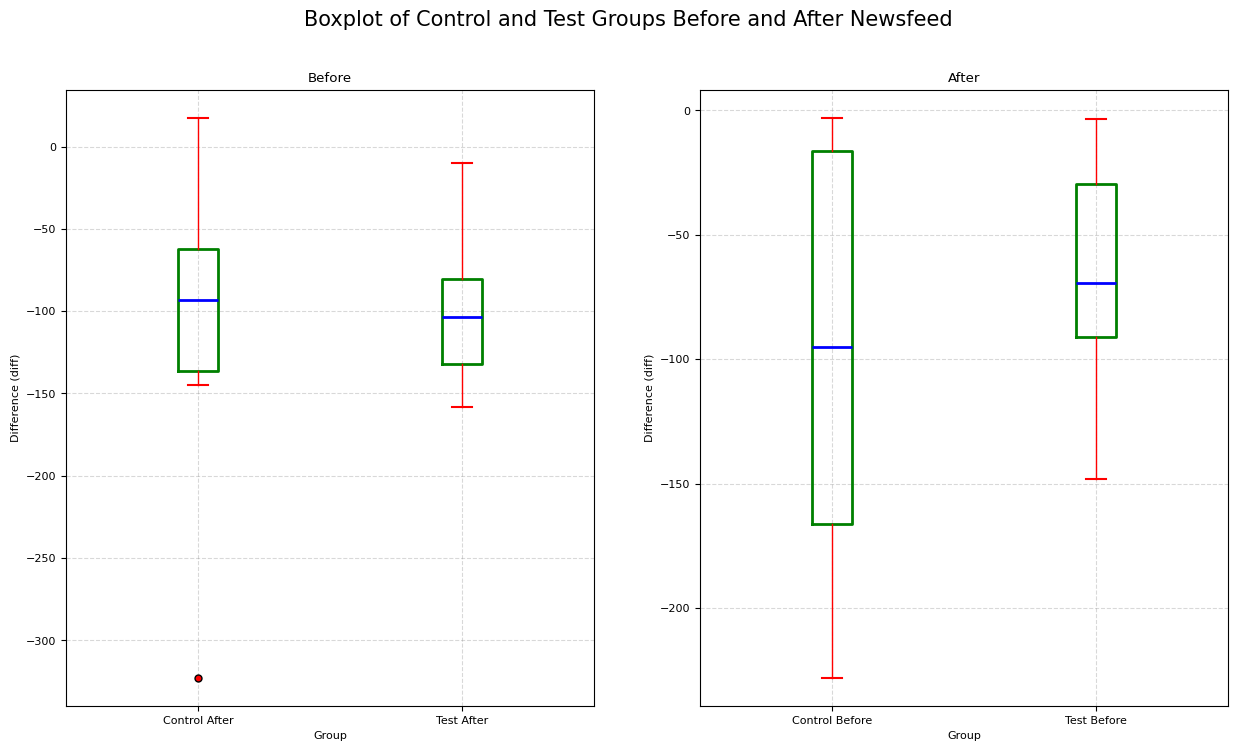

In [56]:
plt.rcParams['font.size'] = 8
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

data_before = [control_before['diff'], test_before['diff']]
data_after = [control_after['diff'], test_after['diff']]

labels_before = ['Control Before', 'Test Before']
labels_after = ['Control After', 'Test After']

boxplot_before = axes[1].boxplot(
    data_before,
    tick_labels=labels_before,
    patch_artist=False, 
    boxprops=dict(linewidth=2, color='green'),
    medianprops=dict(linewidth=2, color='blue'),
    whiskerprops=dict(linewidth=1, color='red'),
    capprops=dict(linewidth=1.5, color='red'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red')
)

boxplot_after = axes[0].boxplot(
    data_after,
    tick_labels=labels_after,
    patch_artist=False, 
    boxprops=dict(linewidth=2, color='green'),
    medianprops=dict(linewidth=2, color='blue'),
    whiskerprops=dict(linewidth=1, color='red'),
    capprops=dict(linewidth=1.5, color='red'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red')
)


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')

fig.suptitle('Boxplot of Control and Test Groups Before and After Newsfeed', fontsize=15)

for ax, title in zip(axes, ['Before', 'After']):
    ax.set_xlabel('Group')
    ax.set_ylabel('Difference (diff)')
    ax.set_title(title)

plt.show()

#### 4. Отвечаем на допы:

* “What was the IQR of the control group before the newsfeed?”

In [58]:
Q1 = control_before['diff'].quantile(0.25)
Q3 = control_before['diff'].quantile(0.75)
IQR = Q3 - Q1

IQR_rounded = round(IQR / 10) * 10

print(f"The answer is: {IQR_rounded}.")

The answer is: 150.
